# Creating and plotting composites

In this lesson, we'll:

* Learn how to create composites from Landsat scenes using xlandsat
* Plot composites using xarray and matplotlib
* Create more complex visualizations blending composites and other information

## Importing

We'll start by importing the usual libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import xlandsat as xls

## Data

We'll use a cropped Landsat 8 scene from the December 2015 eruption of [Momotombo](https://en.wikipedia.org/wiki/Momotombo), Nicaragua. If you **don't have the file already**, do the following:

1. Download the cropped scene from https://doi.org/10.6084/m9.figshare.21931089.v2 (the file is `LC08_L2SP_017051_20151205_20200908_02_T1-cropped.tar.gz`)
1. Drag and drop it into the file browser on JupyterLab to make sure it's in the same folder as this notebook

If you have the `LC08_L2SP_017051_20151205_20200908_02_T1-cropped.tar.gz` file in the same folder as this notebook, you can run the following code to load the scene into an `xarray.Dataset` using xlandsat.

In [2]:
scene = xls.load_scene("LC08_L2SP_017051_20151205_20200908_02_T1-cropped.tar.gz")
scene

<xarray.Dataset>
Dimensions:   (easting: 467, northing: 333)
Coordinates:
  * easting   (easting) float64 5.44e+05 5.44e+05 ... 5.58e+05 5.58e+05
  * northing  (northing) float64 1.369e+06 1.369e+06 ... 1.379e+06 1.379e+06
Data variables:
    blue      (northing, easting) float16 -0.05554 -0.05481 ... 0.07788 0.07727
    green     (northing, easting) float16 0.04834 0.05066 ... 0.1056 0.1027
    red       (northing, easting) float16 0.006226 0.01105 ... 0.1163 0.1045
    nir       (northing, easting) float16 0.01483 0.02124 ... 0.2435 0.2367
    swir1     (northing, easting) float16 0.06189 0.06409 ... 0.2098 0.1976
    swir2     (northing, easting) float16 0.06519 0.06628 ... 0.1571 0.1527
    thermal   (northing, easting) float16 293.5 293.5 293.8 ... 311.0 312.0
Attributes: (12/19)
    Conventions:                CF-1.8
    title:                      Landsat 8 scene from 2015-12-05 (path/row=17/51)
    digital_object_identifier:  https://doi.org/10.5066/P9OGBGM6
    origin:                     Image courtesy of the U.S. Geological Survey
    landsat_product_id:         LC08_L2SP_017051_20151205_20200908_02_T1
    processing_level:           L2SP
    ...                         ...
    ellipsoid:                  WGS84
    date_acquired:              2015-12-05
    scene_center_time:          16:06:06.8773380Z
    wrs_path:                   17
    wrs_row:                    51
    mtl_file:                   GROUP = LANDSAT_METADATA_FILE\n  GROUP = PROD...

## Creating an RGB composite

In remote sensing, a *composite* is a particular combination of 3 bands that are assigned to the "red", "green", and "blue" channels of an image. Using the actual red, green, and blue bands will result in a **true colour (RGB)** composite. But we can use whatever combination of bands we desire, which would result in a **false colour** composite.

Lets use function [`xlandsat.composite`](https://www.compgeolab.org/xlandsat/latest/api/generated/xlandsat.composite.html#xlandsat.composite) to create an RGB composite from our scene. 

In [3]:
rgb = xls.composite(scene)
rgb

/home/leo/bin/conda/envs/remote-sensing/lib/python3.10/site-packages/skimage/exposure/exposure.py:598: RuntimeWarning: invalid value encountered in cast
  return np.asarray(image * (omax - omin) + omin, dtype=out_dtype)


<xarray.DataArray 'composite_red_green_blue' (northing: 333, easting: 467,
                                              channel: 4)>
array([[[ 19,  35,  11, 255],
        [ 21,  36,  11, 255],
        [ 22,  36,  12, 255],
        ...,
        [ 38,  44,  44, 255],
        [ 36,  43,  43, 255],
        [ 36,  43,  43, 255]],

       [[ 19,  35,  12, 255],
        [ 19,  35,  11, 255],
        [ 21,  36,  10, 255],
        ...,
        [ 36,  42,  43, 255],
        [ 35,  41,  42, 255],
        [ 35,  41,  42, 255]],

       [[ 19,  35,  11, 255],
        [ 19,  35,   9, 255],
        [ 20,  36,   8, 255],
        ...,
...
        ...,
        [ 43,  49,  45, 255],
        [ 43,  48,  44, 255],
        [ 45,  49,  46, 255]],

       [[ 42,  51,  44, 255],
        [ 43,  52,  44, 255],
        [ 42,  52,  44, 255],
        ...,
        [ 42,  48,  45, 255],
        [ 47,  49,  46, 255],
        [ 48,  50,  47, 255]],

       [[ 42,  51,  43, 255],
        [ 42,  51,  44, 255],
        [ 42,  51,  44, 255],
        ...,
        [ 41,  47,  44, 255],
        [ 50,  51,  46, 255],
        [ 46,  50,  46, 255]]], dtype=uint8)
Coordinates:
  * channel   (channel) <U5 'red' 'green' 'blue' 'alpha'
  * easting   (easting) float64 5.44e+05 5.44e+05 ... 5.58e+05 5.58e+05
  * northing  (northing) float64 1.369e+06 1.369e+06 ... 1.379e+06 1.379e+06
Attributes: (12/20)
    long_name:                  red, green, blue composite
    Conventions:                CF-1.8
    title:                      Landsat 8 scene from 2015-12-05 (path/row=17/51)
    digital_object_identifier:  https://doi.org/10.5066/P9OGBGM6
    origin:                     Image courtesy of the U.S. Geological Survey
    landsat_product_id:         LC08_L2SP_017051_20151205_20200908_02_T1
    ...                         ...
    ellipsoid:                  WGS84
    date_acquired:              2015-12-05
    scene_center_time:          16:06:06.8773380Z
    wrs_path:                   17
    wrs_row:                    51
    mtl_file:                   GROUP = LANDSAT_METADATA_FILE\n  GROUP = PROD...

The composite is an `xarray.DataArray` just like the bands of our scene. It has the same coordinates and a lot of the same metadata (see the "Attributes" tab in the preview above). But, unlike the bands, this is a **3D array**. The third dimension are the "channels" which represent the red, green, blue, and "alpha" values for each pixel as unsigned 8-bit integers (i.e., values between 0-255). The alpha channel controls the transparency of each pixel. Pixels that have missing data will have their alpha set to 0, making them transparent. All other pixels have maximum alpha (255) to make them fully opaque.

Plotting a composite like can be done with xarray's `.plot` mechanism, very similar to how we plot individual bands. But instead of using `pcolormesh` to create a pseudo-color plot, we will use `imshow` to display this RGB image.

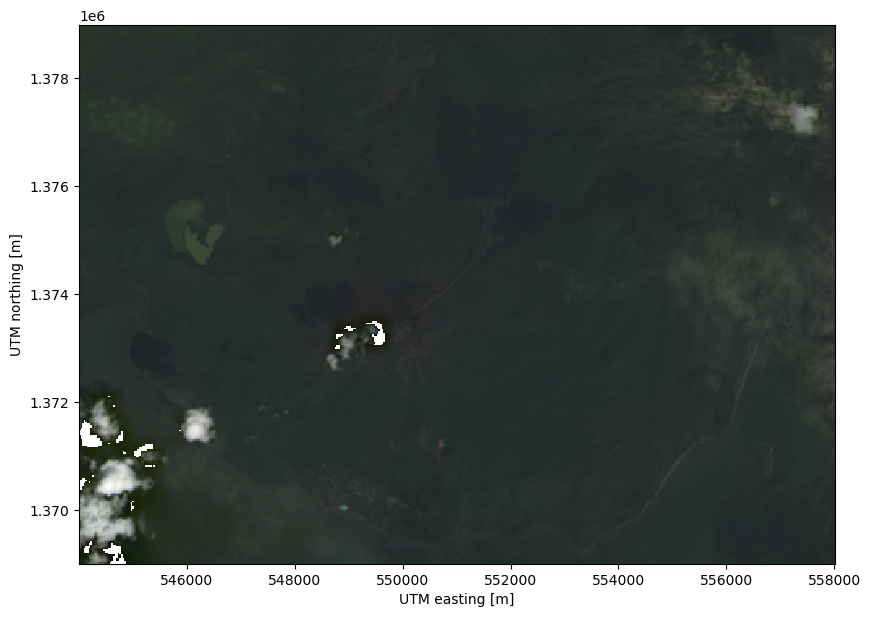

In [4]:
plt.figure(figsize=(10, 7))
ax = plt.axes()
rgb.plot.imshow(ax=ax)
ax.set_aspect("equal")

This image is very dark. This often happens with optical remote sensing data because some objects, like clouds and buildings, reflect much more strongly than all of the rest. This means that the reflectance values for most of the image is squeezed into a small range so that the high reflectance pixels can be included in the limited number of bits available. 

Let's see this in action by plotting histograms of the reflectance values for each of the red, green, and blue bands.

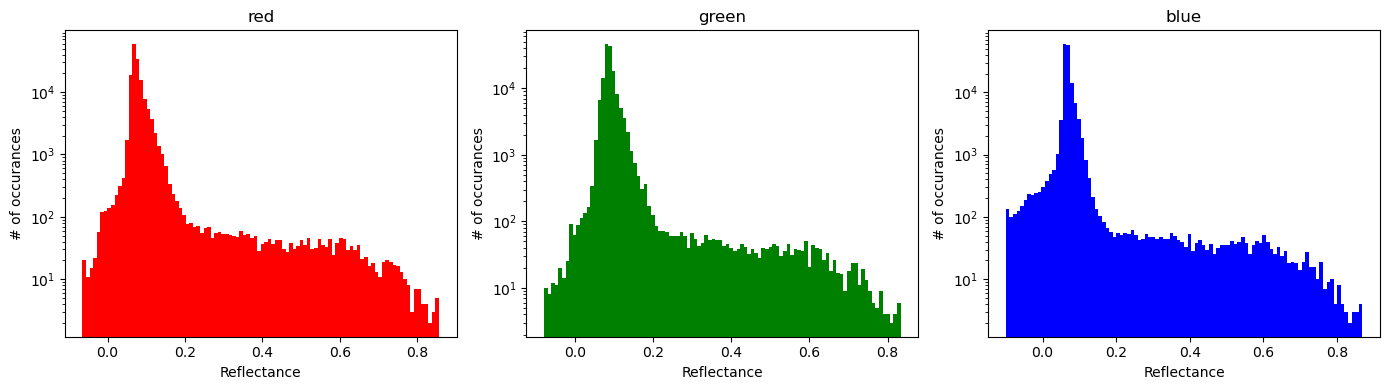

In [5]:
plt.figure(figsize=(14, 4))

ax = plt.subplot(1, 3, 1)
# .ravel() converts an N-dimensional array into a 1D one. 
# This is needed for hist to work.
ax.hist(scene.red.values.ravel(), bins=100, color="red")
ax.set_title("red")
ax.set_xlabel("Reflectance")
ax.set_ylabel("# of occurances")
# Make this log scale in y so we can see the small number of 
# high reflectance pixels
ax.set_yscale("log")

ax = plt.subplot(1, 3, 2)
ax.hist(scene.green.values.ravel(), bins=100, color="green")
ax.set_title("green")
ax.set_xlabel("Reflectance")
ax.set_ylabel("# of occurances")
ax.set_yscale("log")

ax = plt.subplot(1, 3, 3)
ax.hist(scene.blue.values.ravel(), bins=100, color="blue")
ax.set_title("blue")
ax.set_xlabel("Reflectance")
ax.set_ylabel("# of occurances")
ax.set_yscale("log")

plt.tight_layout()

Notice that the vast majority of pixels falls within the range `[0, 0.2]` but there are a few that go all the way to 0.8. So our composite will lack contrast between the values in that narrow range because they will be represented by a fairly small portion of the 0-255 values in it. If we want to highlight the parts of the image that are within the range of `[0, 0.2]` reflectance, then we need to rescale our composite to scale values in that narrow range to the full 0-255 range in the final image.

---

### 🤔 **Your turn** 

Recreate the plot above using a `for` loop instead to remove the repeated code.

> 💡 **Tip:** Notice the code that is unchanged for each plot and the 2 things that change. The things that change will be used as the loop variables.

----

## Contrast stretching

Fortunately, we can fix this lack of contrast in our composite by rescaling the intensity values of the image in a process known as **contrast stretching**. With xlandsat, this can be done by passing the `rescale_to` argument to `xlandsat.composite`. This argument should be a list with 2 values: the minimum and maximum reflectance value that will be used and stretched to the 0-255 range.

In [6]:
rgb_stretched = xls.composite(scene, rescale_to=[0, 0.2])
rgb_stretched

/home/leo/bin/conda/envs/remote-sensing/lib/python3.10/site-packages/skimage/exposure/exposure.py:598: RuntimeWarning: invalid value encountered in cast
  return np.asarray(image * (omax - omin) + omin, dtype=out_dtype)


<xarray.DataArray 'composite_red_green_blue' (northing: 333, easting: 467,
                                              channel: 4)>
array([[[  7,  61,   0, 255],
        [ 14,  64,   0, 255],
        [ 20,  67,   0, 255],
        ...,
        [ 92, 103,  85, 255],
        [ 87,  97,  83, 255],
        [ 85,  97,  82, 255]],

       [[  5,  60,   0, 255],
        [  8,  63,   0, 255],
        [ 14,  67,   0, 255],
        ...,
        [ 83,  95,  82, 255],
        [ 79,  90,  77, 255],
        [ 79,  91,  76, 255]],

       [[  8,  62,   0, 255],
        [  9,  63,   0, 255],
        [  9,  65,   0, 255],
        ...,
...
        ...,
        [117, 124,  91, 255],
        [117, 119,  87, 255],
        [126, 127,  95, 255]],

       [[112, 133,  88, 255],
        [116, 138,  88, 255],
        [113, 138,  88, 255],
        ...,
        [112, 121,  90, 255],
        [136, 127,  97, 255],
        [140, 129, 101, 255]],

       [[111, 133,  85, 255],
        [113, 135,  89, 255],
        [111, 133,  89, 255],
        ...,
        [107, 115,  86, 255],
        [148, 134,  99, 255],
        [133, 131,  98, 255]]], dtype=uint8)
Coordinates:
  * channel   (channel) <U5 'red' 'green' 'blue' 'alpha'
  * easting   (easting) float64 5.44e+05 5.44e+05 ... 5.58e+05 5.58e+05
  * northing  (northing) float64 1.369e+06 1.369e+06 ... 1.379e+06 1.379e+06
Attributes: (12/20)
    long_name:                  red, green, blue composite
    Conventions:                CF-1.8
    title:                      Landsat 8 scene from 2015-12-05 (path/row=17/51)
    digital_object_identifier:  https://doi.org/10.5066/P9OGBGM6
    origin:                     Image courtesy of the U.S. Geological Survey
    landsat_product_id:         LC08_L2SP_017051_20151205_20200908_02_T1
    ...                         ...
    ellipsoid:                  WGS84
    date_acquired:              2015-12-05
    scene_center_time:          16:06:06.8773380Z
    wrs_path:                   17
    wrs_row:                    51
    mtl_file:                   GROUP = LANDSAT_METADATA_FILE\n  GROUP = PROD...

Now let's make our plot again with the original side-by-side and see what changed.

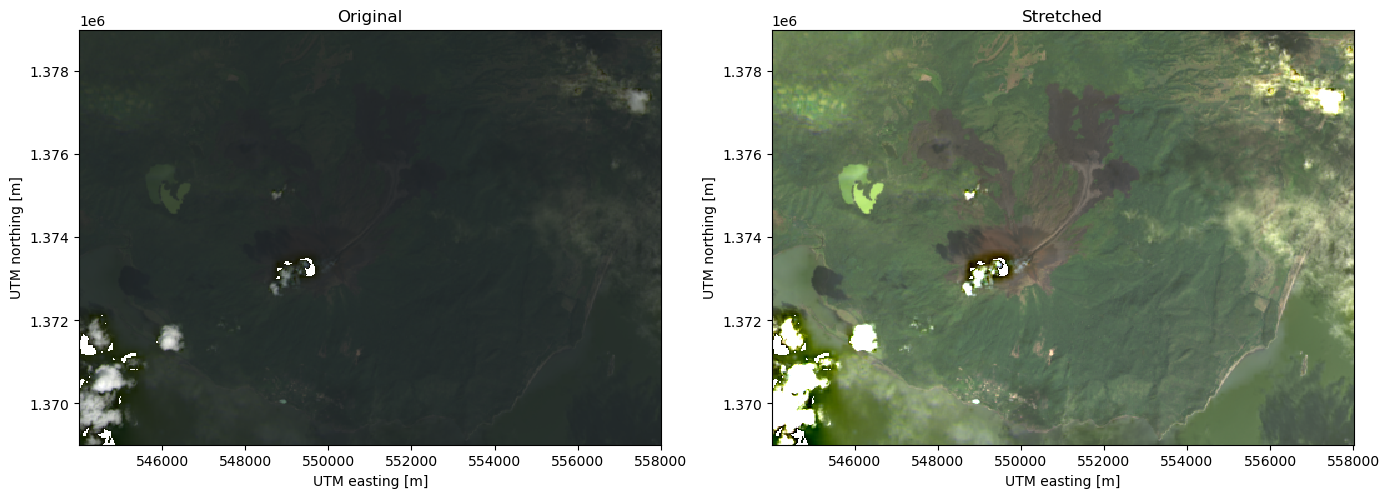

In [7]:
plt.figure(figsize=(14, 5))

ax = plt.subplot(1, 2, 1)
rgb.plot.imshow(ax=ax)
ax.set_aspect("equal")
ax.set_title("Original")

ax = plt.subplot(1, 2, 2)
rgb_stretched.plot.imshow(ax=ax)
ax.set_aspect("equal")
ax.set_title("Stretched")

plt.tight_layout()

That's much better! Now we can see the volcano in the middle of the image, some vegetation, the coastline of Lago de Managua, and the clouds that saturated the original image.

---

### 🤔 **Your turn** 

Copy the composite generation and plotting code from above to the cell below. Play with different values for `rescale_to` to see if you can arrive at a better image with more contrast.  

> 💡 **Tip:** Change values in increments of ±0.01.

----

## Highlighting vegetation with a color infrared composite

Composites are used to visually highlight different features of an image based on the spectral refletance properties of different materials. For example, we know that chlorophyll reflects very strongly on the near-infrared (NIR) range. The **color infrared (CIR) composite** aims to highlight vegetation by taking advantage of this. A CIR composite has NIR as the red channel, red as the green channel, and green as the blue channel. 

We can create a CIR composite with xlandsat by passing the `bands` argument to `xlandsat.composite`. This argument should be a list of band names to use for red, green, and blue channels, respectively.

In [8]:
cir = xls.composite(scene, rescale_to=[0, 0.2], bands=["nir", "red", "green"])
cir

<xarray.DataArray 'composite_nir_red_green' (northing: 333, easting: 467,
                                             channel: 4)>
array([[[ 18,   7,  61, 255],
        [ 27,  14,  64, 255],
        [ 35,  20,  67, 255],
        ...,
        [ 75,  92, 103, 255],
        [ 70,  87,  97, 255],
        [ 66,  85,  97, 255]],

       [[ 20,   5,  60, 255],
        [ 26,   8,  63, 255],
        [ 30,  14,  67, 255],
        ...,
        [ 67,  83,  95, 255],
        [ 61,  79,  90, 255],
        [ 60,  79,  91, 255]],

       [[ 21,   8,  62, 255],
        [ 25,   9,  63, 255],
        [ 27,   9,  65, 255],
        ...,
...
        ...,
        [255, 117, 124, 255],
        [255, 117, 119, 255],
        [255, 126, 127, 255]],

       [[255, 112, 133, 255],
        [255, 116, 138, 255],
        [255, 113, 138, 255],
        ...,
        [255, 112, 121, 255],
        [255, 136, 127, 255],
        [255, 140, 129, 255]],

       [[255, 111, 133, 255],
        [255, 113, 135, 255],
        [255, 111, 133, 255],
        ...,
        [255, 107, 115, 255],
        [255, 148, 134, 255],
        [255, 133, 131, 255]]], dtype=uint8)
Coordinates:
  * channel   (channel) <U5 'red' 'green' 'blue' 'alpha'
  * easting   (easting) float64 5.44e+05 5.44e+05 ... 5.58e+05 5.58e+05
  * northing  (northing) float64 1.369e+06 1.369e+06 ... 1.379e+06 1.379e+06
Attributes: (12/20)
    long_name:                  near-infrared, red, green composite
    Conventions:                CF-1.8
    title:                      Landsat 8 scene from 2015-12-05 (path/row=17/51)
    digital_object_identifier:  https://doi.org/10.5066/P9OGBGM6
    origin:                     Image courtesy of the U.S. Geological Survey
    landsat_product_id:         LC08_L2SP_017051_20151205_20200908_02_T1
    ...                         ...
    ellipsoid:                  WGS84
    date_acquired:              2015-12-05
    scene_center_time:          16:06:06.8773380Z
    wrs_path:                   17
    wrs_row:                    51
    mtl_file:                   GROUP = LANDSAT_METADATA_FILE\n  GROUP = PROD...

We plot it in the same way we did our RGB composite.

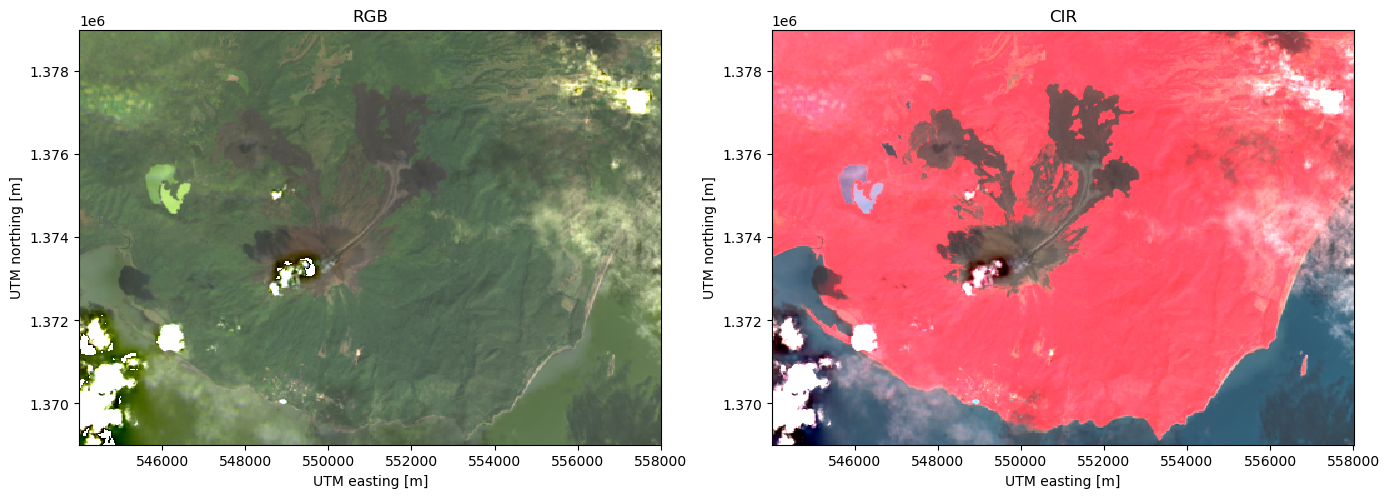

In [9]:
plt.figure(figsize=(14, 5))

ax = plt.subplot(1, 2, 1)
rgb_stretched.plot.imshow(ax=ax)
ax.set_aspect("equal")
ax.set_title("RGB")

ax = plt.subplot(1, 2, 2)
cir.plot.imshow(ax=ax)
ax.set_aspect("equal")
ax.set_title("CIR")

plt.tight_layout()

The contrast stretching range for this composite could be better but this is good enough to highlight the main properties of CIR composite:

1. Vegetation shows up as very bright red. This is because the strong NIR reflection is assigned to the red channel.
1. The contrast between vegetation and bare rock/soil is highlighted since it will still be dark.
1. Water reflects NIR and red very poorly so the green water in the RGB shows up as blue in the CIR composite.

---

### 🤔 **Your turn** 

Copy the CIR composite generation and plotting code from above to the cell below. Play with different values for `rescale_to` to see if you can arrive at a better CIR image with more contrast.  

> 💡 **Tip:** The best values the CIR composite may differ from the RGB composite because the NIR band is different. Make a histogram plot of the NIR band to verify the appropriate range.

----

## Layering plots to create complex visualizations

Neither the RGB or the CIR composites are good at highlighting the ongoing eruption at Momotombo. This is because the lava flows don't reflect strongly on any of those bands. The hot lava flows do emit long wavelength radiation that is captured in the thermal band. 

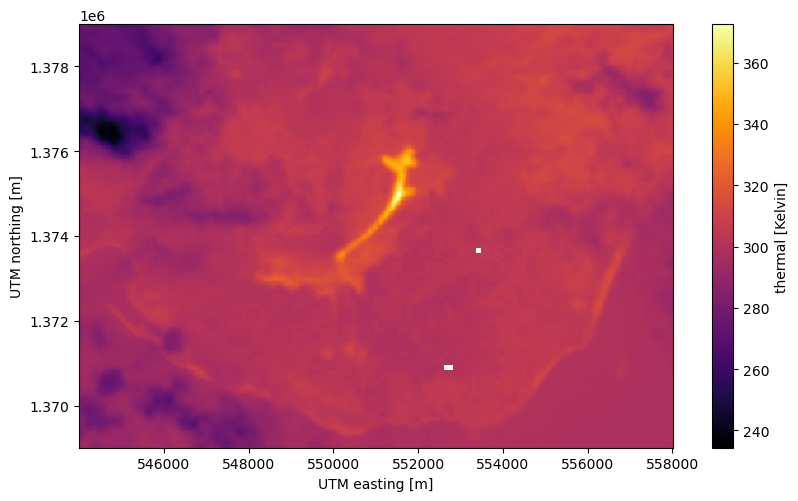

In [10]:
plt.figure(figsize=(10, 5.5))
ax = plt.axes()
scene.thermal.plot.pcolormesh(ax=ax, cmap="inferno")
ax.set_aspect("equal")

But the thermal band contains little other information so it can be hard to get a spatial sense for the location of the lava flow in relation to other landmarks. A good solution to this is to create a figure that layers the RGB and thermal plots. 

We can achieve this by first making all pixels that have lower temperatures (say < 320 K) transparent. With xarray, this can be done by using the [`xarray.where`](https://docs.xarray.dev/en/stable/generated/xarray.where.html) function to set pixels below that threshold to NaN (not-a-number). NaNs are the way computers represent missing values and matplotlib will leave pixels with values of `np.nan` as transparent when making pseudo-color plots.

In [11]:
lava_flow = xr.where(
    scene.thermal > 320,  # First provide a condition
    scene.thermal,  # for pixels where it's true, take values from this
    np.nan,  # for pixels where it's false, use this value
    keep_attrs=True,  # if we don't set this, xarray will through away the metadata
)
lava_flow

<xarray.DataArray 'thermal' (northing: 333, easting: 467)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float16)
Coordinates:
  * easting   (easting) float64 5.44e+05 5.44e+05 ... 5.58e+05 5.58e+05
  * northing  (northing) float64 1.369e+06 1.369e+06 ... 1.379e+06 1.379e+06
Attributes:
    long_name:     thermal
    units:         Kelvin
    number:        10
    filename:      LC08_L2SP_017051_20151205_20200908_02_T1_ST_B10.TIF
    scaling_mult:  0.00341802
    scaling_add:   149.0

Now we have an `xarray.DataArray` that is our thermal band but with all pixels where the surface temperature is below 320 K set to not-a-number (nan).

If we repeat the plot we made above with our new `DataArray`, we should only see the current lava flow.

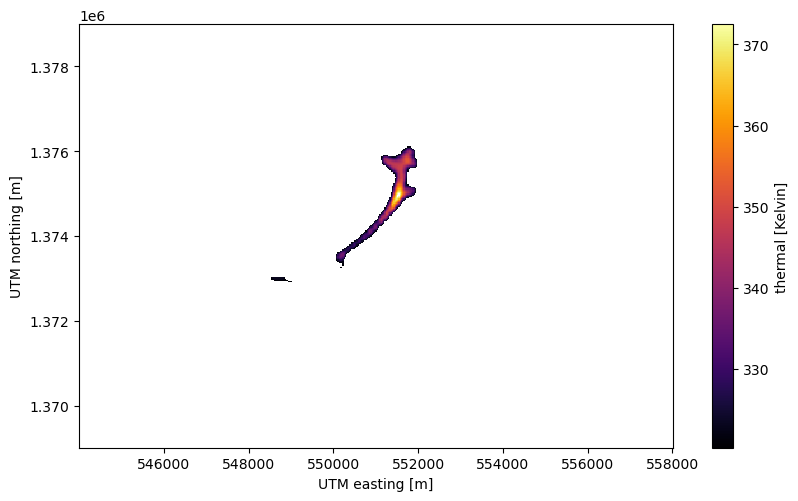

In [12]:
plt.figure(figsize=(10, 5.5))
ax = plt.axes()
# Use lava_flow instead of a band 
lava_flow.plot.pcolormesh(ax=ax, cmap="inferno")
ax.set_aspect("equal")

Now, if we first plot the RGB composite and then plot the pseudo-color map above in the same axes, it will be layered on top.

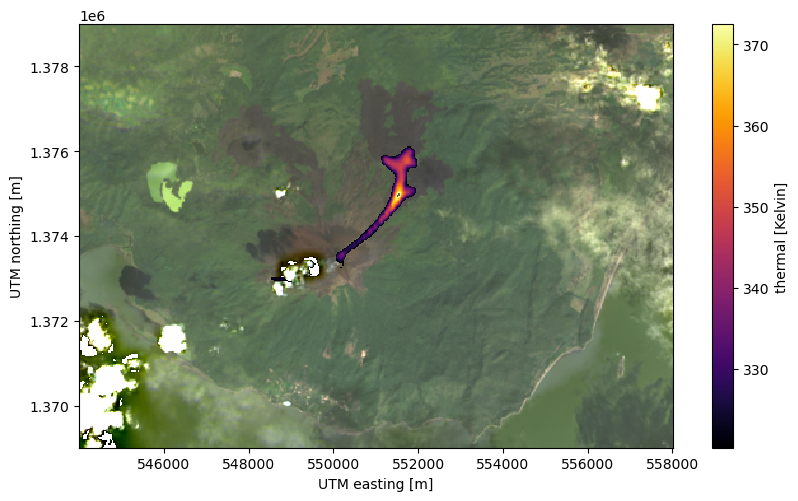

In [13]:
plt.figure(figsize=(10, 5.5))
ax = plt.axes()
# Use this as the background so plot it first
rgb_stretched.plot.imshow(ax=ax)
# Now plot this on top of it. Most pixels are transparent (nan) 
# so we will be able to see the RGB beneath them
lava_flow.plot.pcolormesh(ax=ax, cmap="inferno")
ax.set_aspect("equal")

This image provides the spatial context and highlights the current lava flow through the pixels with high surface temperature.

---

### 🤔 **Your turn** 

Experiment with generating composites using other band combinations. Be creative and look for examples of commonly used combinations online. For example, try to use the SWIR bands to highlight the lava flows.  

> 💡 **Tip:** Here are some useful links: 
> * https://www.usgs.gov/media/images/common-landsat-band-combinations
> * https://www.usgs.gov/faqs/what-are-best-landsat-spectral-bands-use-my-research
> * https://www.usgs.gov/media/images/common-landsat-band-rgb-composites
> * https://landsat.gsfc.nasa.gov/satellites/landsat-8/landsat-8-bands/
> * https://earthobservatory.nasa.gov/features/FalseColor